In [102]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sqlalchemy import create_engine

# Step 1: Pulling in the Data

In [103]:
# Pull in data - python, not used here
# Source: http://web.mta.info/developers/turnstile.html
"""
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [220108, 220115, 220122, 220129, 220205, 220212, 220219, 220226, 220305, 220312, 220319, 220326, 220402]
turnstiles_df = get_data(week_nums)
"""

'\ndef get_data(week_nums):\n    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"\n    dfs = []\n    for week_num in week_nums:\n        file_url = url.format(week_num)\n        dfs.append(pd.read_csv(file_url))\n    return pd.concat(dfs)\n        \nweek_nums = [220108, 220115, 220122, 220129, 220205, 220212, 220219, 220226, 220305, 220312, 220319, 220326, 220402]\nturnstiles_df = get_data(week_nums)\n'

In [104]:
# Pull in data - SQL

# connect to local database
engine = create_engine("sqlite:///mta_data.db")
turnstiles_df = pd.read_sql('SELECT * FROM mta_data;', engine)

# Step 2: Cleaning Data

In [107]:
turnstiles_df.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [106]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2022,00:00:00,REGULAR,7703737,2695797
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2022,04:00:00,REGULAR,7703739,2695803
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2022,08:00:00,REGULAR,7703749,2695831
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2022,12:00:00,REGULAR,7703774,2695912
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2022,16:00:00,REGULAR,7703824,2695965


In [4]:
#remove spaces from columns
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [5]:
#Add datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [6]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2192865,R249,R179,01-05-01,86 ST,2022-04-16 08:00:00,2
2559231,R534,R055,01-05-00,FLUSHING-MAIN,2022-04-24 04:00:00,2
2192874,R249,R179,01-05-01,86 ST,2022-04-17 20:00:00,2
2192873,R249,R179,01-05-01,86 ST,2022-04-17 16:00:00,2
2192872,R249,R179,01-05-01,86 ST,2022-04-17 12:00:00,2
2192871,R249,R179,01-05-01,86 ST,2022-04-17 08:00:00,2
2192870,R249,R179,01-05-01,86 ST,2022-04-17 04:00:00,2
2192869,R249,R179,01-05-01,86 ST,2022-04-17 00:00:00,2
2192868,R249,R179,01-05-01,86 ST,2022-04-16 20:00:00,2
2192867,R249,R179,01-05-01,86 ST,2022-04-16 16:00:00,2


In [7]:
#Check why there are multiple entries
mask = ((turnstiles_df["C/A"] == "R249") & 
(turnstiles_df["UNIT"] == "R179") & 
(turnstiles_df["SCP"] == "01-05-01") & 
(turnstiles_df["STATION"] == "86 ST") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2022, 4, 16).date()))

turnstiles_df[mask].head(10)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
380530,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,00:00:00,REGULAR,131072,253,2022-04-16 00:00:00
380531,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,00:00:00,RECOVR AUD,393216,0,2022-04-16 00:00:00
380532,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,04:00:00,REGULAR,131072,253,2022-04-16 04:00:00
380533,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,04:00:00,RECOVR AUD,393216,0,2022-04-16 04:00:00
380534,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,08:00:00,REGULAR,131072,253,2022-04-16 08:00:00
380535,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,08:00:00,RECOVR AUD,393216,0,2022-04-16 08:00:00
380536,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,12:00:00,REGULAR,131072,253,2022-04-16 12:00:00
380537,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,12:00:00,RECOVR AUD,393216,0,2022-04-16 12:00:00
380538,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,16:00:00,REGULAR,131072,253,2022-04-16 16:00:00
380539,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,16:00:00,RECOVR AUD,393216,0,2022-04-16 16:00:00


In [8]:
# Check why there are multiple entries
turnstiles_df.DESC.value_counts()

REGULAR       2722232
RECOVR AUD      13738
Name: DESC, dtype: int64

In [9]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [10]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2022-01-29 03:00:00,1
1823957,R142,R293,01-00-01,34 ST-PENN STA,2022-02-07 21:00:00,1
1823959,R142,R293,01-00-01,34 ST-PENN STA,2022-02-08 05:00:00,1
1823960,R142,R293,01-00-01,34 ST-PENN STA,2022-02-08 09:00:00,1
1823961,R142,R293,01-00-01,34 ST-PENN STA,2022-02-08 13:00:00,1


In [11]:
# Drop DESC column
turnstiles_df = turnstiles_df.drop(["DESC"], axis=1, errors="ignore")


In [12]:
# Create a daily entries/exits column for each turnstile
turnstiles_df_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        ['ENTRIES', 'EXITS'].first())



turnstiles_df_daily[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_df_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

# Drop the rows for the earliest date in the df
turnstiles_df_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

# Fix counter reset and counter working in reverse

def get_daily_counts(row, max_counter, col, col_prev):
    counter = row[col] - row[col_prev]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        counter = min(row[col], row[col_prev])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_df_daily["DAILY_ENTRIES"] = turnstiles_df_daily.apply(get_daily_counts, axis=1,
                                                                 max_counter=10000,
                                                                 col = 'ENTRIES',
                                                                 col_prev = 'PREV_ENTRIES')

turnstiles_df_daily["DAILY_EXITS"] = turnstiles_df_daily.apply(get_daily_counts, axis=1,
                                                                 max_counter=10000,
                                                                 col = 'EXITS',
                                                                 col_prev = 'PREV_EXITS')




/var/folders/jj/09j2m0t111n7wln3gwkzlcch0000gn/T/ipykernel_39775/1618613989.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_df_daily = (turnstiles_df
/var/folders/jj/09j2m0t111n7wln3gwkzlcch0000gn/T/ipykernel_39775/1618613989.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_df_daily[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_df_daily


In [13]:
#create dataframe with column for entries/exits count at 9am and 1pm

turnstiles_df_13 = turnstiles_df[turnstiles_df.TIME == '13:00:00'][["C/A", "UNIT", "SCP", "STATION", "DATE", "ENTRIES", "EXITS"]]
turnstiles_df_9 = turnstiles_df[turnstiles_df.TIME == '09:00:00'][["C/A", "UNIT", "SCP", "STATION", "DATE", "ENTRIES", "EXITS"]]

turnstiles_df_am = pd.merge(turnstiles_df_13, turnstiles_df_9, on=["C/A", "UNIT", "SCP", "STATION", "DATE"], suffixes=('_9', '_13'))

turnstiles_df_am["MORNING_ENTRIES"] = turnstiles_df_am.apply(get_daily_counts, axis=1,
                                                             max_counter=10000,
                                                             col = 'ENTRIES_13',
                                                             col_prev = 'ENTRIES_9')

turnstiles_df_am["MORNING_EXITS"] = turnstiles_df_am.apply(get_daily_counts, axis=1,
                                                           max_counter=10000,
                                                           col = 'EXITS_13',
                                                           col_prev = 'EXITS_9')



# Part 3: Analysis

## 3a: Daily Entries

In [108]:
#Station Totals and Median - Daily
station_daily = turnstiles_df_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES', 'DAILY_EXITS']].sum().reset_index()

station_totals = pd.merge(station_daily.groupby('STATION').sum(),
                          station_daily.groupby('STATION').median(),
                          on = 'STATION',
                          suffixes=('_total', '_median')).reset_index()


#### Busiest Stations by Total Daily Entries

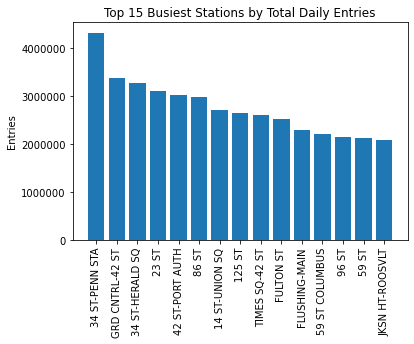

In [112]:
station_totals.sort_values('DAILY_ENTRIES_total', ascending=False, inplace = True)

plt.bar(x = station_totals['STATION'][:15], height = station_totals['DAILY_ENTRIES_total'][:15])
plt.xticks(rotation=90)
plt.title('Top 15 Busiest Stations by Total Daily Entries')
plt.ylabel('Entries')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('total_daily_entries.png', bbox_inches = 'tight')

#### Busiest Stations by Median Daily Entries

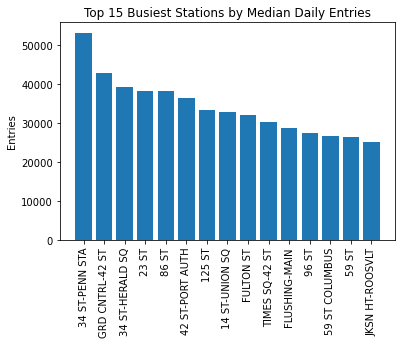

In [113]:
station_totals.sort_values('DAILY_ENTRIES_median', ascending=False, inplace = True)

plt.bar(x = station_totals['STATION'][:15], height = station_totals['DAILY_ENTRIES_median'][:15])
plt.xticks(rotation=90)
plt.title('Top 15 Busiest Stations by Median Daily Entries')
plt.ylabel('Entries')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('median_daily_entries.png', bbox_inches = 'tight')

#### Daily Entries Boxplot

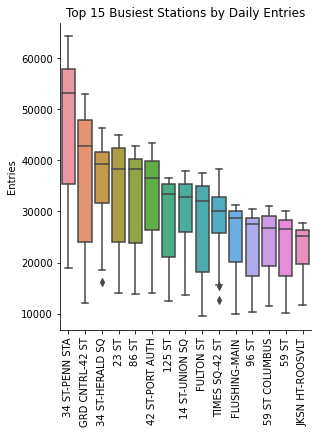

In [120]:
sns.catplot(x = 'STATION',
            y = 'DAILY_ENTRIES',
            kind = 'box',
            data = station_daily[station_daily.STATION.isin(station_totals['STATION'][:15])],
            order = station_totals['STATION'][:15])
plt.xticks(rotation=90)
plt.ylabel('Entries')
plt.xlabel('')
plt.title('Top 15 Busiest Stations by Daily Entries')
plt.savefig('daily_entries_box.png', bbox_inches = 'tight')

## 3b: Daily Exits

#### Busiest Stations by Total Daily Exits

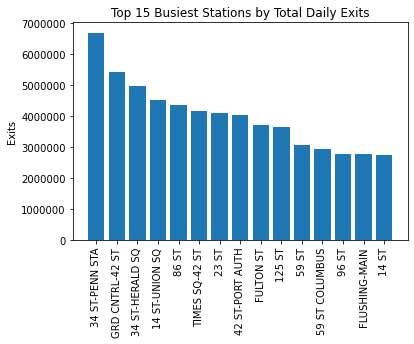

In [121]:
station_totals.sort_values('DAILY_EXITS_total', ascending=False, inplace = True)

plt.bar(x = station_totals['STATION'][:15], height = station_totals['DAILY_EXITS_total'][:15])
plt.xticks(rotation=90)
plt.title('Top 15 Busiest Stations by Total Daily Exits')
plt.ylabel('Exits')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('total_daily_exits.png', bbox_inches = 'tight')

#### Busiest Stations by Median Daily Exits

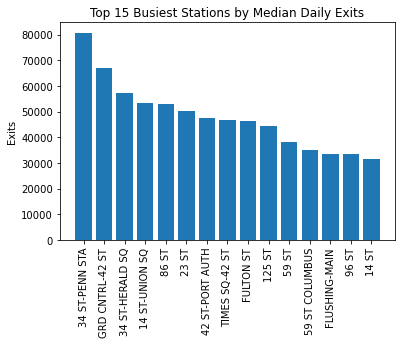

In [122]:
station_totals.sort_values('DAILY_EXITS_median', ascending=False, inplace = True)

plt.bar(x = station_totals['STATION'][:15], height = station_totals['DAILY_EXITS_median'][:15])
plt.xticks(rotation=90)
plt.title('Top 15 Busiest Stations by Median Daily Exits')
plt.ylabel('Exits')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('median_daily_exits.png', bbox_inches = 'tight')

#### Daily Exits Boxplot

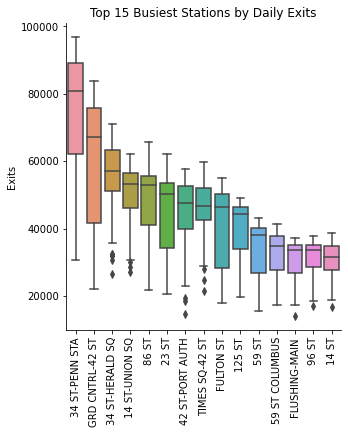

In [123]:
sns.catplot(x = 'STATION',
            y = 'DAILY_EXITS',
            kind = 'box',
            data = station_daily[station_daily.STATION.isin(station_totals['STATION'][:15])],
            order = station_totals['STATION'][:15])
plt.xticks(rotation=90)
plt.ylabel('Exits')
plt.xlabel('')
plt.title('Top 15 Busiest Stations by Daily Exits')
plt.savefig('daily_exits_box.png', bbox_inches = 'tight')

## 3c: Morning Entries

#### Busiest Stations by Total Morning Entries

In [124]:
#Station Totals and Median - Morning
station_am_daily = turnstiles_df_am.groupby(["STATION", "DATE"])[['MORNING_ENTRIES', 'MORNING_EXITS']].sum().reset_index()

station_am_totals = pd.merge(station_am_daily.groupby('STATION').sum(),
                             station_am_daily.groupby('STATION').median(),
                             on = 'STATION', suffixes=('_total', '_median')).reset_index()


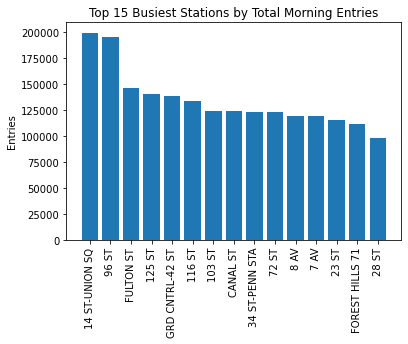

In [125]:
station_am_totals.sort_values('MORNING_ENTRIES_total', ascending=False, inplace = True)

plt.bar(x = station_am_totals['STATION'][:15], height = station_am_totals['MORNING_ENTRIES_total'][:15])
plt.xticks(rotation=90)
plt.title('Top 15 Busiest Stations by Total Morning Entries')
plt.ylabel('Entries')
plt.savefig('total_am_entries.png', bbox_inches = 'tight')

#### Busiest Stations by Median Morning Entries

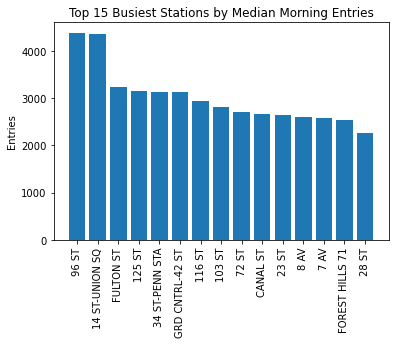

In [126]:
station_am_totals.sort_values('MORNING_ENTRIES_median', ascending=False, inplace = True)

plt.bar(x = station_am_totals['STATION'][:15], height = station_am_totals['MORNING_ENTRIES_median'][:15])
plt.xticks(rotation=90)
plt.title('Top 15 Busiest Stations by Median Morning Entries')
plt.ylabel('Entries')
plt.savefig('median_am_entries.png', bbox_inches = 'tight')

#### Morning Entries Boxplot

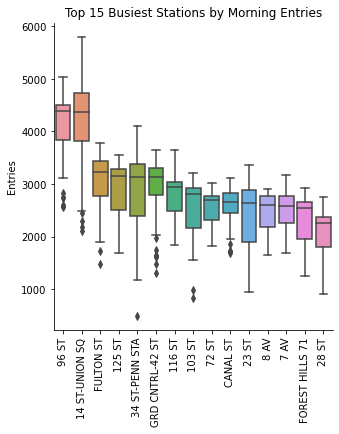

In [127]:
sns.catplot(x = 'STATION',
            y = 'MORNING_ENTRIES',
            kind = 'box',
            data = station_am_daily[station_am_daily.STATION.isin(station_am_totals['STATION'][:15])],
            order = station_am_totals['STATION'][:15])
plt.xticks(rotation=90)
plt.ylabel('Entries')
plt.xlabel('')
plt.title('Top 15 Busiest Stations by Morning Entries')
plt.savefig('morning_entries_box.png', bbox_inches = 'tight')

## 3d: Morning Exits

#### Busiest Stations by Total Morning Exits

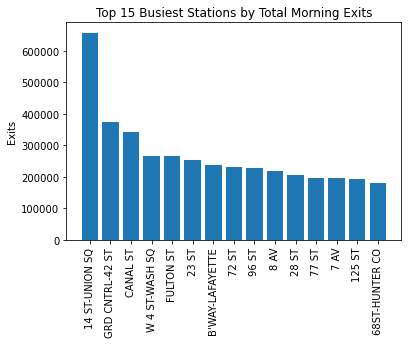

In [128]:
station_am_totals.sort_values('MORNING_EXITS_total', ascending=False, inplace = True)

plt.bar(x = station_am_totals['STATION'][:15], height = station_am_totals['MORNING_EXITS_total'][:15])
plt.xticks(rotation=90)
plt.title('Top 15 Busiest Stations by Total Morning Exits')
plt.ylabel('Exits')
plt.savefig('total_am_exits.png', bbox_inches = 'tight')

#### Busiest Stations by Median Morning Exits

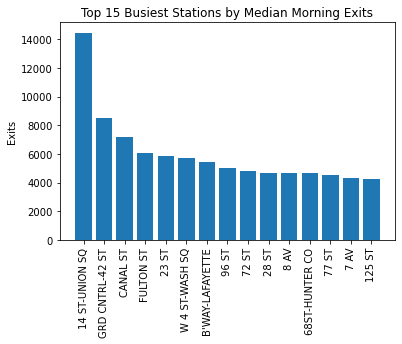

In [129]:
station_am_totals.sort_values('MORNING_EXITS_median', ascending=False, inplace = True)

plt.bar(x = station_am_totals['STATION'][:15], height = station_am_totals['MORNING_EXITS_median'][:15])
plt.xticks(rotation=90)
plt.title('Top 15 Busiest Stations by Median Morning Exits')
plt.ylabel('Exits')
plt.savefig('median_am_exits.png', bbox_inches = 'tight')

#### Morning Exits Boxplot

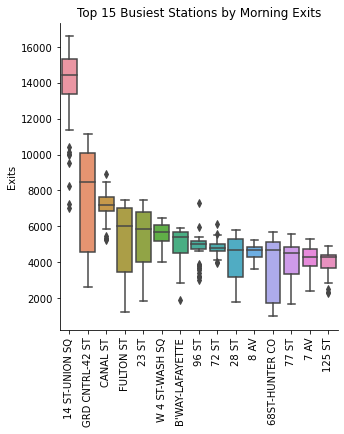

In [130]:
sns.catplot(x = 'STATION',
            y = 'MORNING_EXITS',
            kind = 'box',
            data = station_am_daily[station_am_daily.STATION.isin(station_am_totals['STATION'][:15])],
            order = station_am_totals['STATION'][:15])
plt.xticks(rotation=90)
plt.ylabel('Exits')
plt.xlabel('')
plt.title('Top 15 Busiest Stations by Morning Exits')
plt.savefig('morning_exits_box.png', bbox_inches = 'tight')